In [1]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv("car-mpg.csv")

In [3]:
car.shape

(398, 10)

In [4]:
car.sample(10)

mpg  cyl   disp   hp    wt   acc  yr  origin  car_type  \
346  32.3    4   97.0   67  2065  17.8  81       3         1   
120  19.0    4  121.0  112  2868  15.5  73       2         1   
116  16.0    8  400.0  230  4278   9.5  73       1         0   
131  32.0    4   71.0   65  1836  21.0  74       3         1   
314  26.4    4  140.0   88  2870  18.1  80       1         1   
184  25.0    4  140.0   92  2572  14.9  76       1         1   
22   25.0    4  104.0   95  2375  17.5  70       2         1   
360  30.7    6  145.0   76  3160  19.6  81       2         0   
273  23.9    4  119.0   97  2405  14.9  78       3         1   
78   21.0    4  120.0   87  2979  19.5  72       2         1   

                car_name  
346               subaru  
120          volvo 144ea  
116   pontiac grand prix  
131  toyota corolla 1200  
314        ford fairmont  
184             capri ii  
22              saab 99e  
360         volvo diesel  
273        datsun 200-sx  
78      peugeot 504 (sw)

In [5]:
car.drop("car_name",axis=1,inplace=True)

In [6]:
car.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin    car_type  
count  398.000000  398.000000  398.000000  
mean    76.010050    1.572864    0.530151  
std      3.697627    0.802055    0.499718  
min     70.000000    1.000000    0.000000  
25%     73.000000    1.000000    0.000000  
50%     76.000000    1.000000    1.000000  
75%     79.000000    2.000000    1.000000  
max     82.000000    3.000000    1.000000

In [7]:
car["origin"]=car["origin"].replace({1:"america",2:"europe",3:"australia"})
car.sample(10)

mpg  cyl   disp   hp    wt   acc  yr     origin  car_type
64   15.0    8  318.0  150  4135  13.5  72    america         0
293  31.9    4   89.0   71  1925  14.0  79     europe         1
125  20.0    6  198.0   95  3102  16.5  74    america         0
331  33.8    4   97.0   67  2145  18.0  80  australia         1
162  15.0    6  258.0  110  3730  19.0  75    america         0
287  16.5    8  351.0  138  3955  13.2  79    america         0
296  27.4    4  121.0   80  2670  15.0  79    america         1
57   24.0    4  113.0   95  2278  15.5  72  australia         1
291  19.2    8  267.0  125  3605  15.0  79    america         0
173  24.0    4  119.0   97  2545  17.0  75  australia         1

In [8]:
car=pd.get_dummies(car,columns=["origin"])
car.sample(10)

mpg  cyl   disp   hp    wt   acc  yr  car_type  origin_america  \
103  11.0    8  400.0  150  4997  14.0  73         0               1   
374  23.0    4  151.0    ?  3035  20.5  82         1               1   
373  24.0    4  140.0   92  2865  16.4  82         1               1   
39   14.0    8  400.0  175  4464  11.5  71         0               1   
108  20.0    4   97.0   88  2279  19.0  73         1               0   
230  15.5    8  350.0  170  4165  11.4  77         0               1   
288  18.2    8  318.0  135  3830  15.2  79         0               1   
6    14.0    8  454.0  220  4354   9.0  70         0               1   
187  17.5    8  305.0  140  4215  13.0  76         0               1   
364  26.6    8  350.0  105  3725  19.0  81         0               1   

     origin_australia  origin_europe  
103                 0              0  
374                 0              0  
373                 0              0  
39                  0              0  
108                 1              0  
230                 0              0  
288                 0              0  
6                   0              0  
187                 0              0  
364                 0              0

In [9]:
car.isnull().sum()

mpg                 0
cyl                 0
disp                0
hp                  0
wt                  0
acc                 0
yr                  0
car_type            0
origin_america      0
origin_australia    0
origin_europe       0
dtype: int64

In [10]:
car.dtypes

mpg                 float64
cyl                   int64
disp                float64
hp                   object
wt                    int64
acc                 float64
yr                    int64
car_type              int64
origin_america        uint8
origin_australia      uint8
origin_europe         uint8
dtype: object

### Replacing the object datatype of column "hp" with float datatype and its values with its Median value 

In [11]:
hpIsDigit= pd.DataFrame(car.hp.str.isdigit())
car[hpIsDigit['hp'] == False]

mpg  cyl   disp hp    wt   acc  yr  car_type  origin_america  \
32   25.0    4   98.0  ?  2046  19.0  71         1               1   
126  21.0    6  200.0  ?  2875  17.0  74         0               1   
330  40.9    4   85.0  ?  1835  17.3  80         1               0   
336  23.6    4  140.0  ?  2905  14.3  80         1               1   
354  34.5    4  100.0  ?  2320  15.8  81         1               0   
374  23.0    4  151.0  ?  3035  20.5  82         1               1   

     origin_australia  origin_europe  
32                  0              0  
126                 0              0  
330                 0              1  
336                 0              0  
354                 0              1  
374                 0              0

In [12]:
car['hp']=car['hp'].replace("?",np.nan)
car['hp']=car['hp'].astype(float)

In [13]:
median1=car['hp'].median()
median1

93.5

In [14]:
car['hp'].replace(np.nan,median1,inplace=True)

In [15]:
car[hpIsDigit['hp'] == False]

mpg  cyl   disp    hp    wt   acc  yr  car_type  origin_america  \
32   25.0    4   98.0  93.5  2046  19.0  71         1               1   
126  21.0    6  200.0  93.5  2875  17.0  74         0               1   
330  40.9    4   85.0  93.5  1835  17.3  80         1               0   
336  23.6    4  140.0  93.5  2905  14.3  80         1               1   
354  34.5    4  100.0  93.5  2320  15.8  81         1               0   
374  23.0    4  151.0  93.5  3035  20.5  82         1               1   

     origin_australia  origin_europe  
32                  0              0  
126                 0              0  
330                 0              1  
336                 0              0  
354                 0              1  
374                 0              0

In [16]:
car.dtypes

mpg                 float64
cyl                   int64
disp                float64
hp                  float64
wt                    int64
acc                 float64
yr                    int64
car_type              int64
origin_america        uint8
origin_australia      uint8
origin_europe         uint8
dtype: object

# Checking for Duplicates

In [17]:
duplicate=car.duplicated()
duplicate.sum()

0

# Handling Outliers

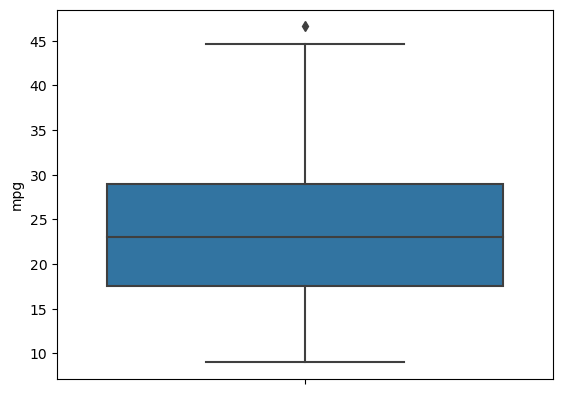

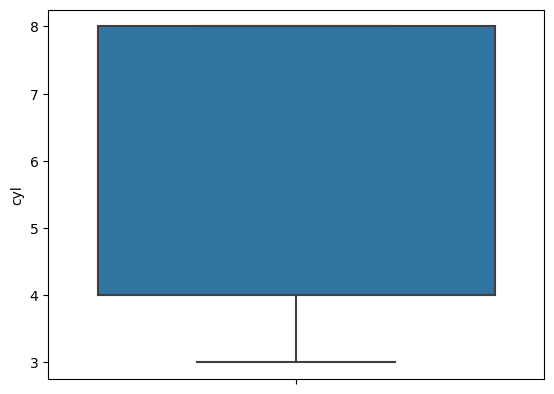

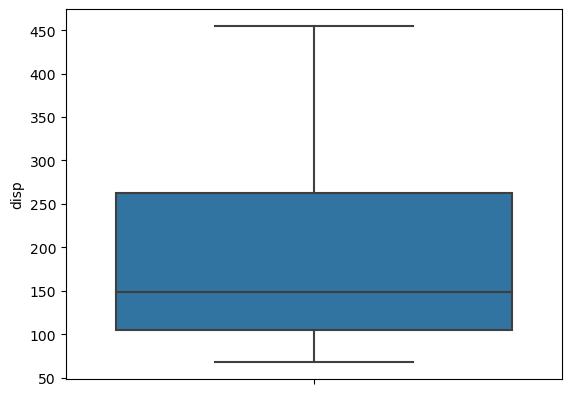

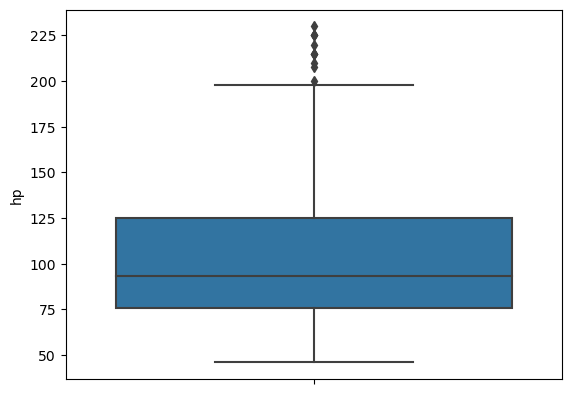

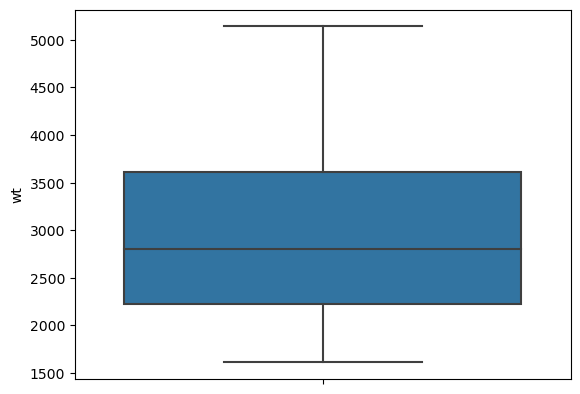

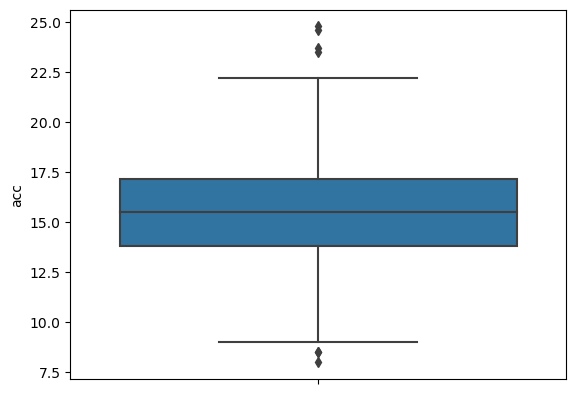

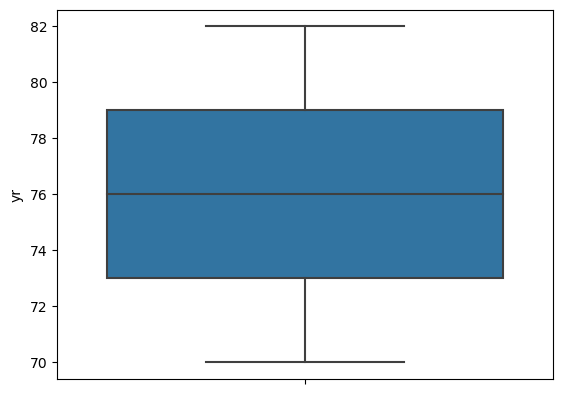

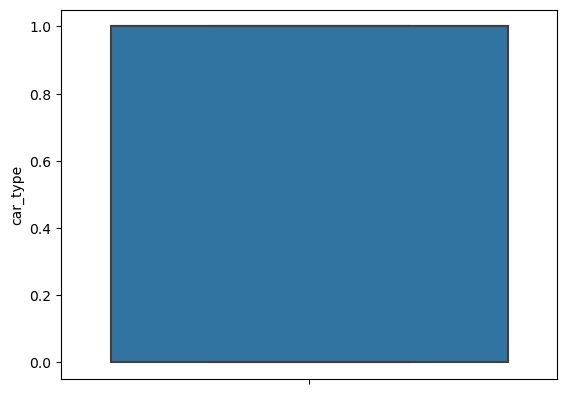

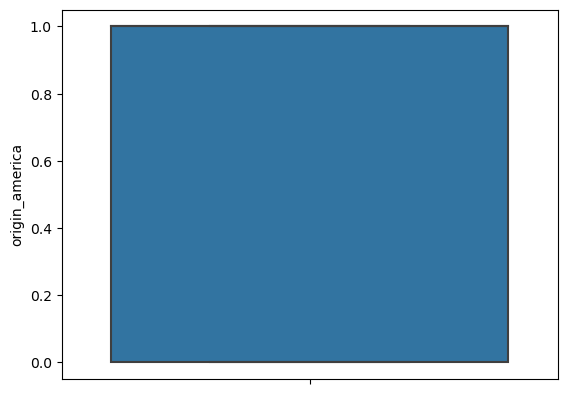

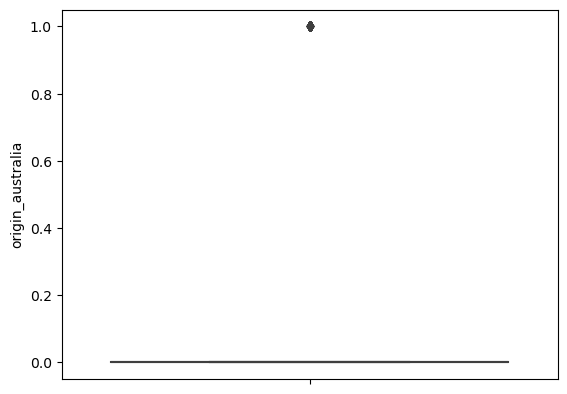

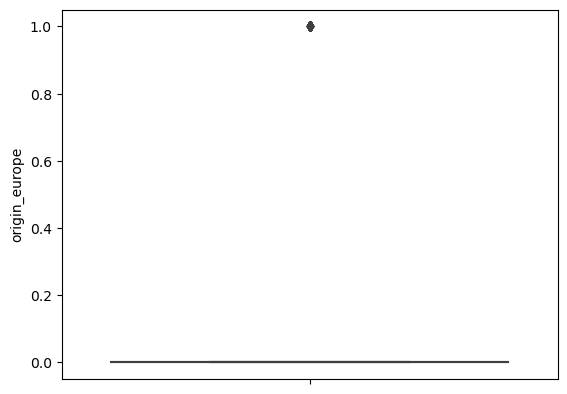

In [18]:
l=['mpg','cyl','disp','hp','wt','acc','yr','car_type','origin_america','origin_australia','origin_europe']
for i in car[l]:
    sns.boxplot(y=car[i])
    plt.show()

In [19]:
def rem_out(c):
    sorted(c)
    q1,q3=c.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [20]:
l,u=rem_out(car["mpg"])
car["mpg"]=np.where(car["mpg"]>u,u,car["mpg"])
car["mpg"]=np.where(car["mpg"]<l,l,car["mpg"])

In [21]:
l,u=rem_out(car["cyl"])
car["cyl"]=np.where(car["cyl"]>u,u,car["cyl"])
car["cyl"]=np.where(car["cyl"]<l,l,car["cyl"])

In [22]:
l,u=rem_out(car["disp"])
car["disp"]=np.where(car["disp"]>u,u,car["disp"])
car["disp"]=np.where(car["disp"]<l,l,car["disp"])

In [23]:
l,u=rem_out(car["hp"])
car["hp"]=np.where(car["hp"]>u,u,car["hp"])
car["hp"]=np.where(car["hp"]<l,l,car["hp"])

In [24]:
l,u=rem_out(car["wt"])
car["wt"]=np.where(car["wt"]>u,u,car["wt"])
car["wt"]=np.where(car["wt"]<l,l,car["wt"])

In [25]:
l,u=rem_out(car["acc"])
car["acc"]=np.where(car["acc"]>u,u,car["acc"])
car["acc"]=np.where(car["acc"]<l,l,car["acc"])

In [26]:
l,u=rem_out(car["yr"])
car["yr"]=np.where(car["yr"]>u,u,car["yr"])
car["yr"]=np.where(car["yr"]<l,l,car["yr"])

In [27]:
l,u=rem_out(car["car_type"])
car["car_type"]=np.where(car["car_type"]>u,u,car["car_type"])
car["car_type"]=np.where(car["car_type"]<l,l,car["car_type"])

In [28]:
l,u=rem_out(car["origin_america"])
car["origin_america"]=np.where(car["origin_america"]>u,u,car["origin_america"])
car["origin_america"]=np.where(car["origin_america"]<l,l,car["origin_america"])

In [29]:
l,u=rem_out(car["origin_australia"])
car["origin_australia"]=np.where(car["origin_australia"]>u,u,car["origin_australia"])
car["origin_australia"]=np.where(car["origin_australia"]<l,l,car["origin_australia"])

In [30]:
l,u=rem_out(car["origin_europe"])
car["origin_europe"]=np.where(car["origin_europe"]>u,u,car["origin_europe"])
car["origin_europe"]=np.where(car["origin_europe"]<l,l,car["origin_europe"])

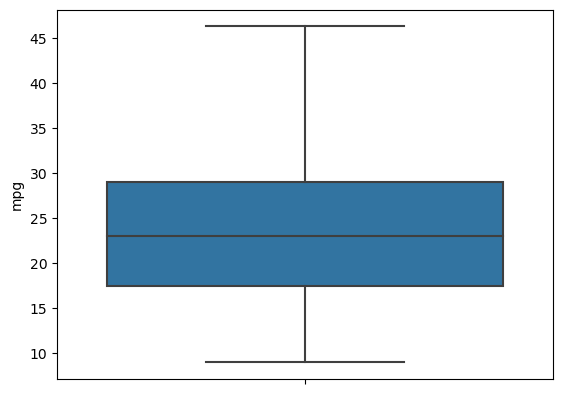

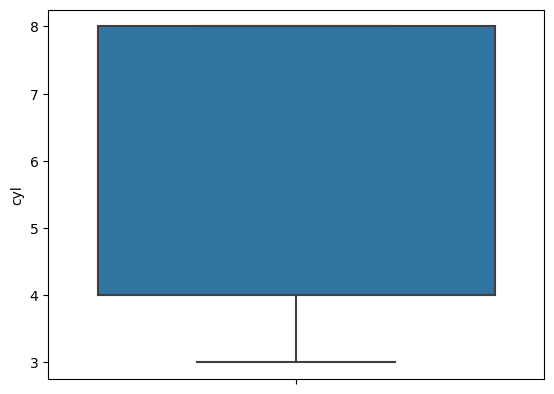

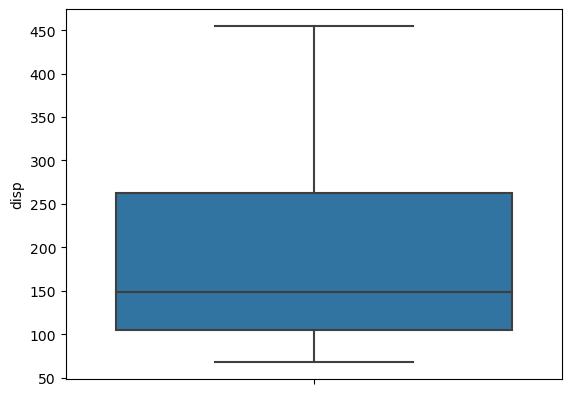

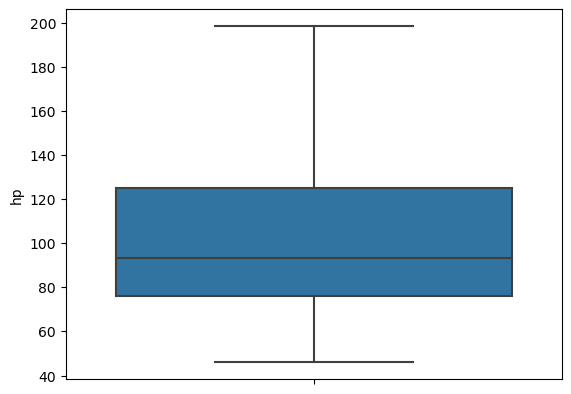

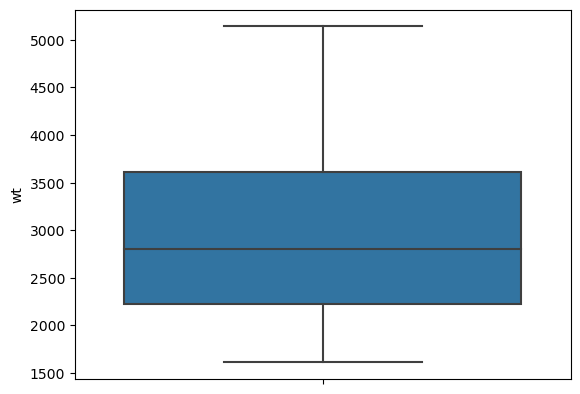

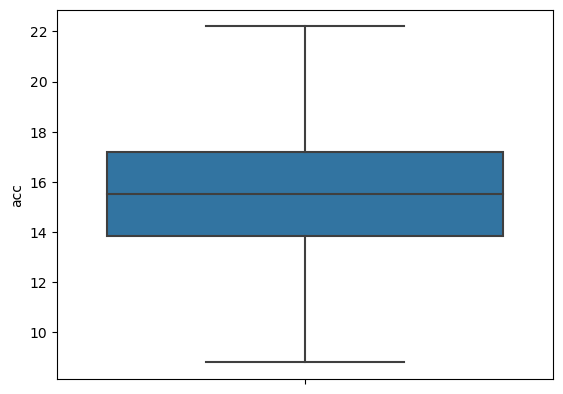

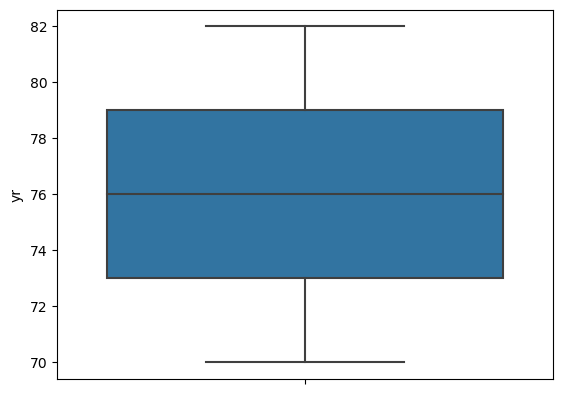

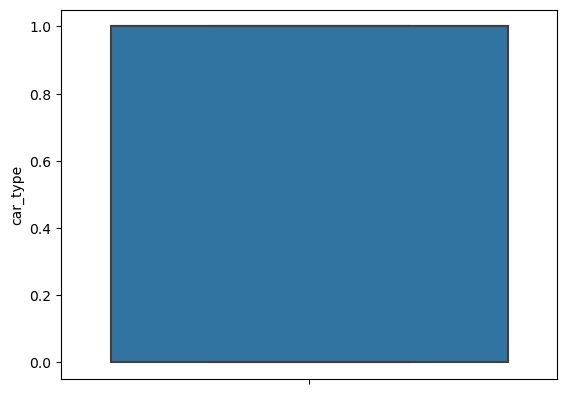

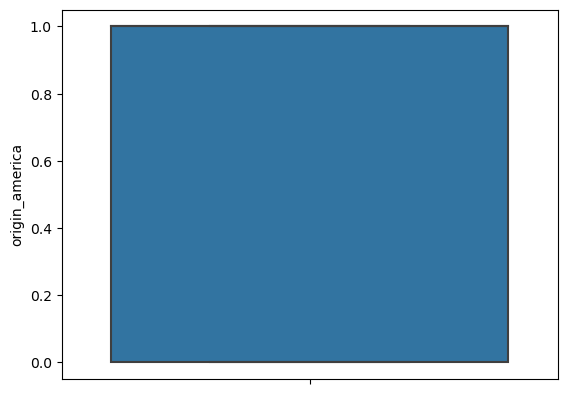

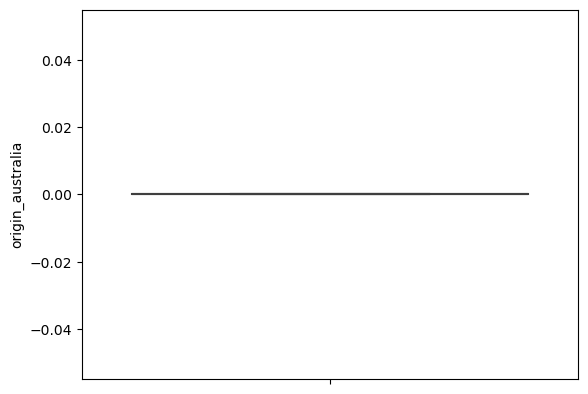

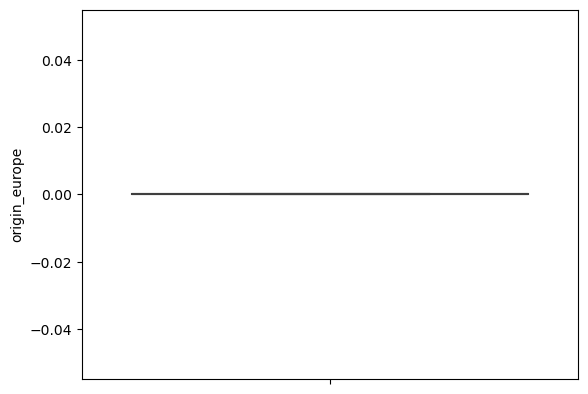

In [31]:
l=['mpg','cyl','disp','hp','wt','acc','yr','car_type','origin_america','origin_australia','origin_europe']
for i in car[l]:
    sns.boxplot(y=car[i])
    plt.show()

# Bivariate Analysis

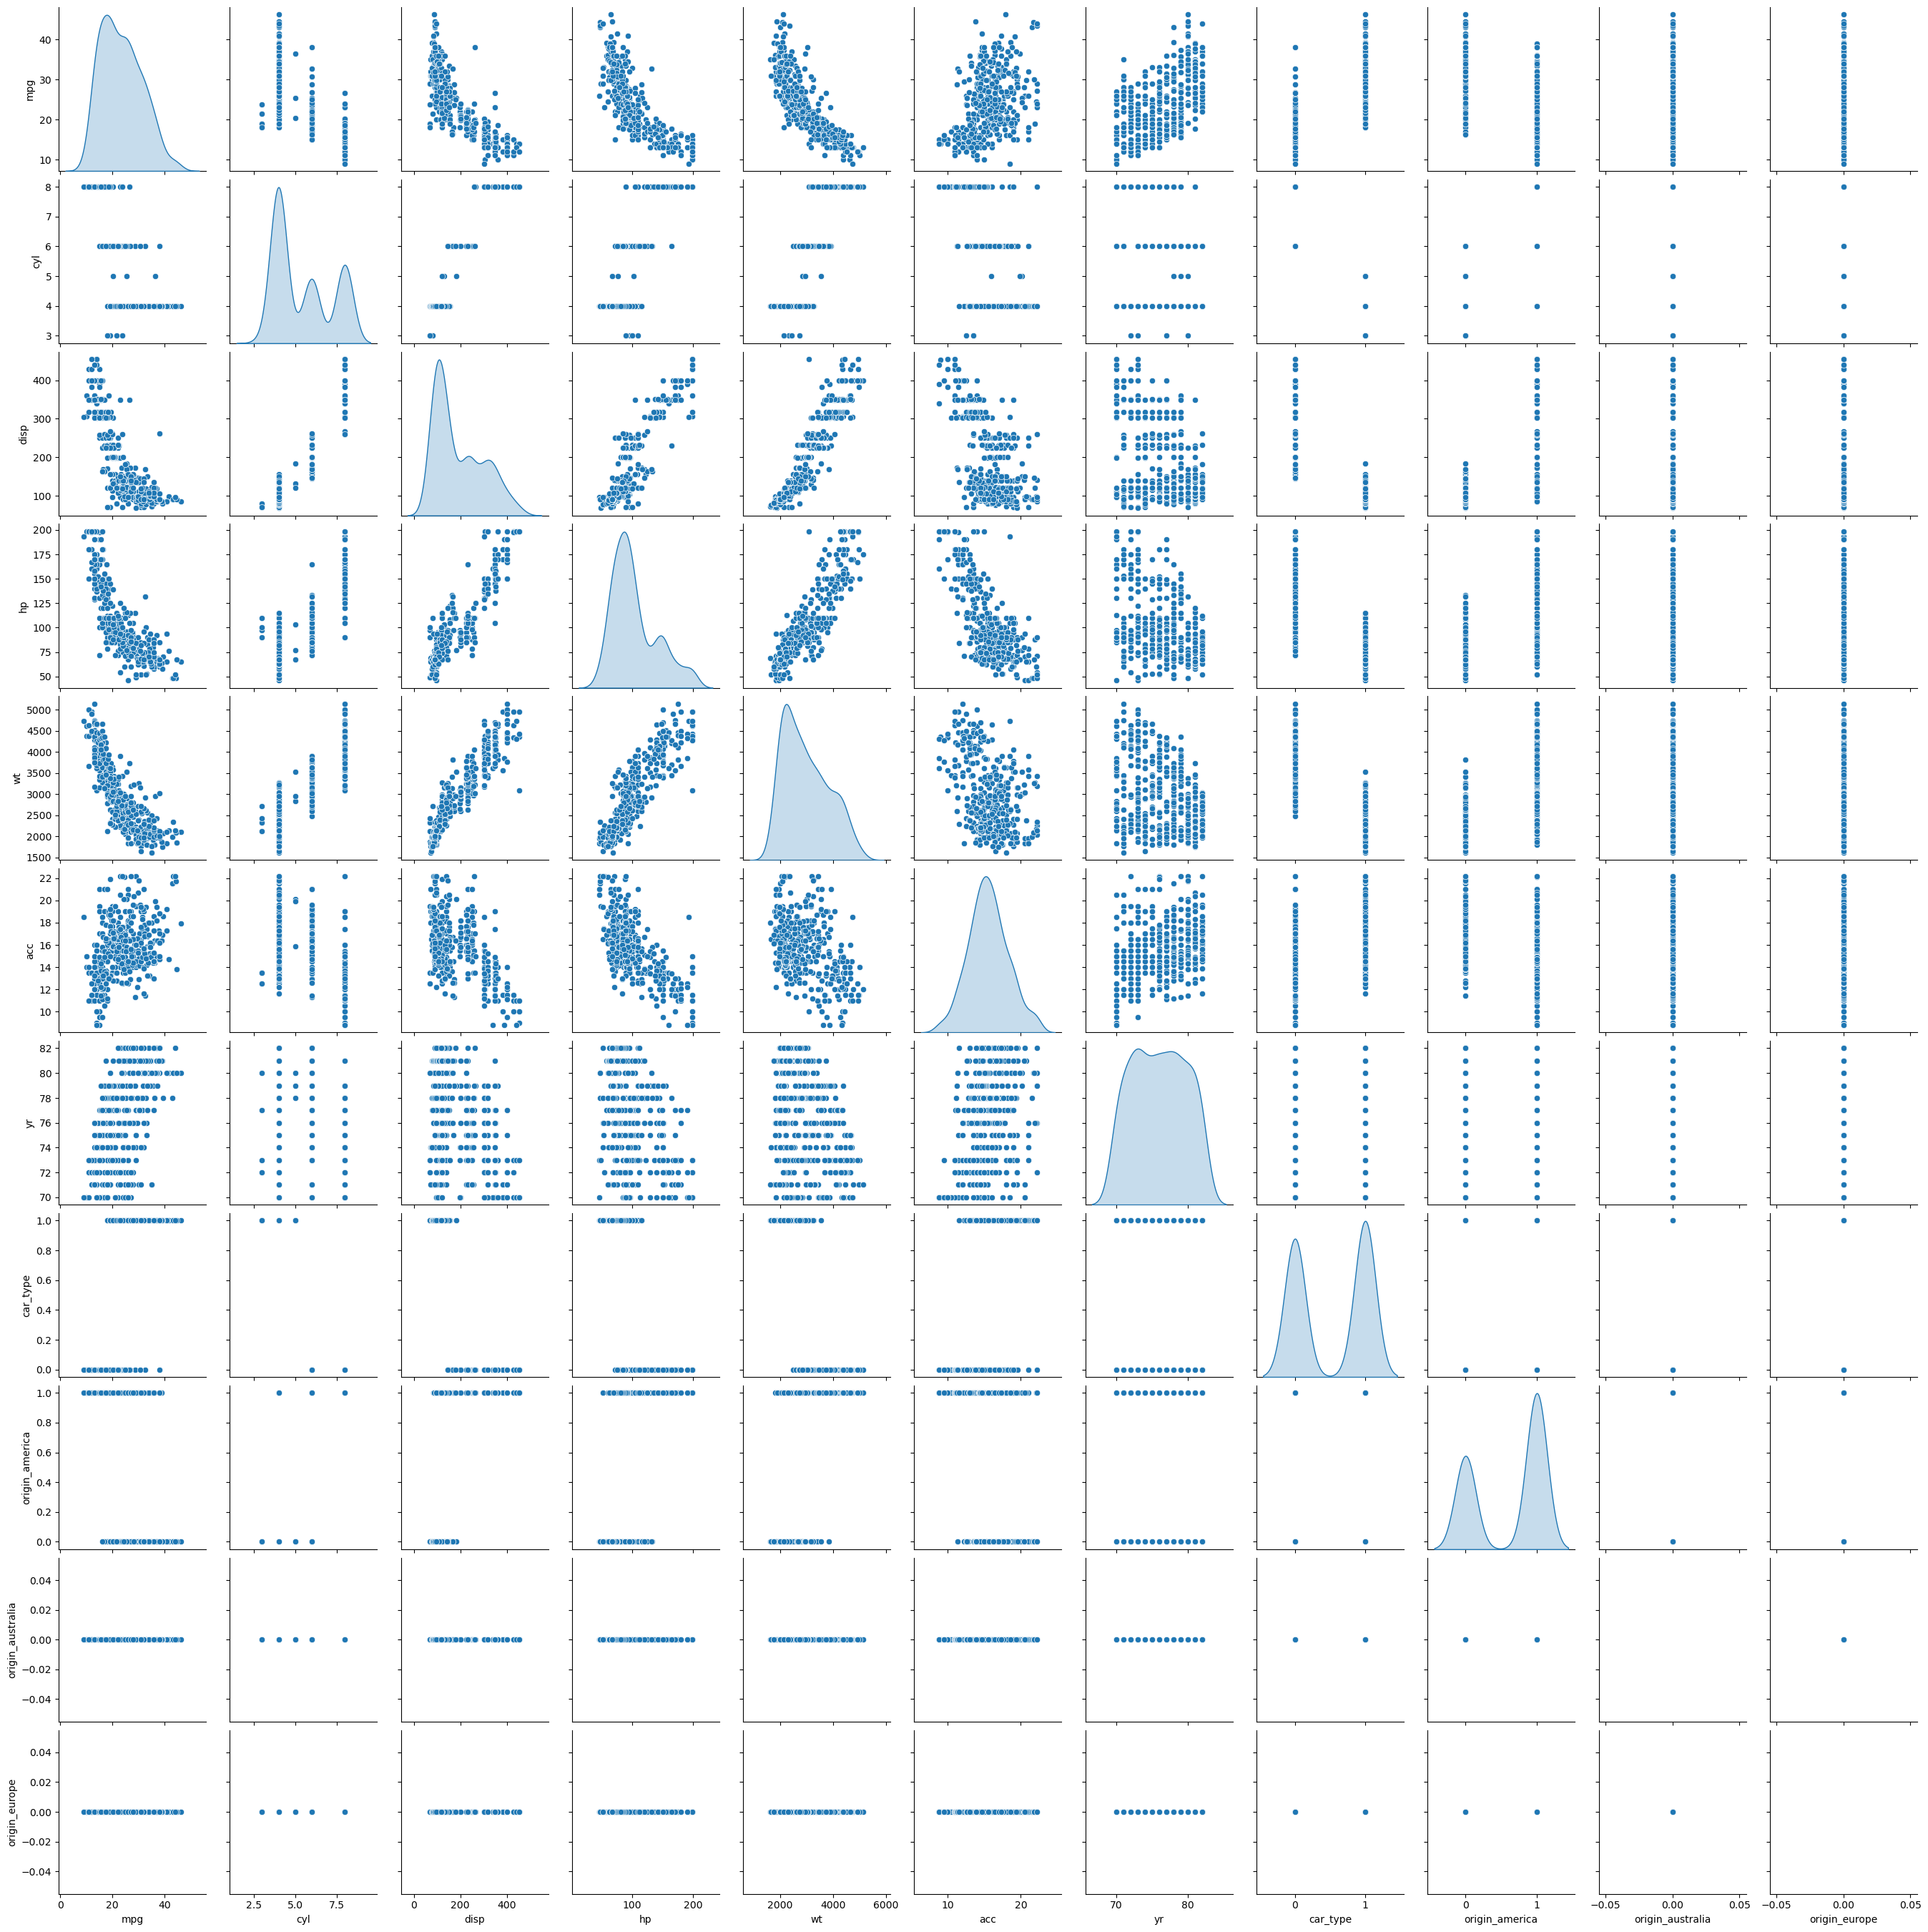

In [32]:
sns.pairplot(car,diag_kind="kde")

# Correlation Heatmap

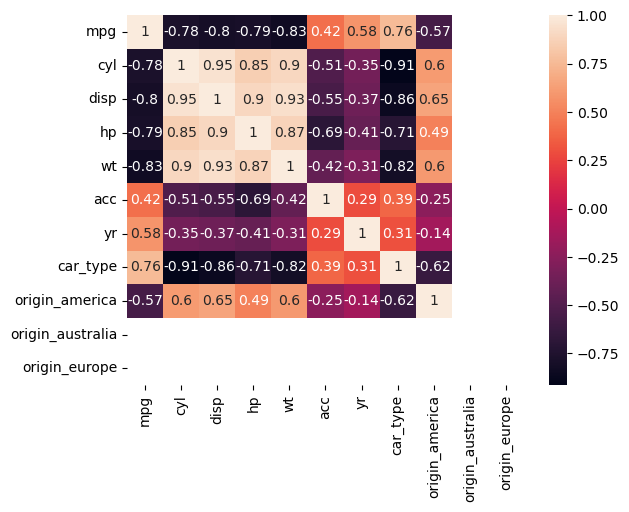

In [33]:
sns.heatmap(data=car.corr(),annot=True)
plt.show()

# Model Train and Test Split

In [34]:
x= car.drop(['mpg'],axis=1)
y= car[['mpg']]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# Linear Regression

In [36]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [37]:
model1.score(x_train,y_train)

0.8373703381386953

In [38]:
model1.score(x_test,y_test)

0.8488618947144682

In [39]:
pred1=model1.predict(x_test)
mse=mean_squared_error(y_test,pred1)
mae=mean_absolute_error(y_test,pred1)
print('RMSE: ',np.sqrt(mse))
print('MAE: ',mae)

RMSE:  2.972639027083462
MAE:  2.33782056108944


# Decision Tree Regressor

In [40]:
model2=DecisionTreeRegressor(max_depth=3,max_leaf_nodes=8,min_samples_leaf=9,random_state=1)

In [41]:
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=8, min_samples_leaf=9,
                      random_state=1)

In [42]:
model2.score(x_train,y_train)

0.8177058116784095

In [43]:
model2.score(x_test,y_test)

0.8045553799884236

In [44]:
pred2=model2.predict(x_test)
mse=mean_squared_error(y_test,pred2)
mae=mean_absolute_error(y_test,pred2)
print('RMSE: ',np.sqrt(mse))
print('MAE: ',mae)

RMSE:  3.380391870372526
MAE:  2.602100928206532


# AdaBoost Regressor

In [45]:
model3=AdaBoostRegressor(n_estimators=10,random_state=1,learning_rate=0.0039)

In [46]:
model3.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.0039, n_estimators=10, random_state=1)

In [47]:
model3.score(x_train,y_train)

0.863522454504584

In [48]:
model3.score(x_test,y_test)

0.8630334645517019

In [49]:
pred3=model3.predict(x_test)
mse=mean_squared_error(y_test,pred3)
mae=mean_absolute_error(y_test,pred3)
print('RMSE: ',np.sqrt(mse))
print('MAE: ',mae)

RMSE:  2.8298435360176843
MAE:  2.0864448652827674


# Gradient Boosting Regressor

In [50]:
model4=GradientBoostingRegressor(n_estimators=40,max_depth=3,max_leaf_nodes=8,random_state=1)

In [51]:
model4.fit(x_train,y_train)

GradientBoostingRegressor(max_leaf_nodes=8, n_estimators=40, random_state=1)

In [52]:
model4.score(x_train,y_train)

0.9538075982067534

In [53]:
model4.score(x_test,y_test)

0.8789766606986449

In [54]:
pred4=model4.predict(x_test)
mse=mean_squared_error(y_test,pred4)
mae=mean_absolute_error(y_test,pred4)
print('RMSE: ',np.sqrt(mse))
print('MAE: ',mae)

RMSE:  2.6600497211964926
MAE:  1.9866599715826012


# K Neighbors Regressor

In [55]:
model5 = KNeighborsRegressor(n_neighbors=8,p=1)

In [56]:
model5.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8, p=1)

In [57]:
model5.score(x_train,y_train)

0.7828745363758127

In [58]:
model5.score(x_test,y_test)

0.7563626322025566

In [59]:
pred5=model5.predict(x_test)
mse=mean_squared_error(y_test,pred5)
mae=mean_absolute_error(y_test,pred5)
print('RMSE: ',np.sqrt(mse))
print('MAE: ',mae)

RMSE:  3.7742193591302207
MAE:  2.6948958333333337


# Bagging Regressor

In [60]:
model6 = BaggingRegressor(n_estimators=9,max_samples=87,random_state=1)

In [61]:
model6.fit(x_train,y_train)

BaggingRegressor(max_samples=87, n_estimators=9, random_state=1)

In [62]:
model6.score(x_train,y_train)

0.9115588725404093

In [63]:
model6.score(x_test,y_test)

0.8804758558709498

In [64]:
pred6=model6.predict(x_test)
mse=mean_squared_error(y_test,pred6)
mae=mean_absolute_error(y_test,pred6)
print('RMSE: ',np.sqrt(mse))
print('MAE: ',mae)

RMSE:  2.6435224914026056
MAE:  1.9418055555555556


# Random Forest Regressor

In [65]:
model7 = RandomForestRegressor(random_state=1,max_depth=7)

In [66]:
model7.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, random_state=1)

In [67]:
model7.score(x_train,y_train)

0.9756730392597649

In [68]:
model7.score(x_test,y_test)

0.8674620674676761

In [69]:
pred7=model7.predict(x_test)
mse=mean_squared_error(y_test,pred7)
mae=mean_absolute_error(y_test,pred7)
print('RMSE: ',np.sqrt(mse))
print('MAE: ',mae)

RMSE:  2.7837182993234038
MAE:  1.9779099932592443


# Graphical representations of the results

In [70]:
res = pd.DataFrame({
    'Model':['Linear Regression','Decision Tree Regressor','AdaBoost Regressor','Gradient Boosting Regressor','K Neighbors Regressor','Bagging Regressor','Random Forest Regressor'],
    'Accuracy Score':[0.8488618947144682,0.8045553799884236,0.8630334645517019,0.8789766606986449,0.7563626322025566,0.8804758558709498,0.8674620674676761],
    'Accuracy Score (in %)':[85,80,86,88,77,88,87],
    'RMSE Score':[2.972639027083462,3.380391870372526,2.8298435360176843,2.6600497211964926,3.7742193591302207,2.6435224914026056,2.7837182993234038],
    'MAE Score':[2.33782056108944,2.602100928206532,2.0864448652827674,1.9866599715826012,2.6948958333333337,1.9418055555555556,1.9779099932592443]})
res=res.sort_values('RMSE Score')
res1=res.sort_values('RMSE Score')
res2=res.sort_values('RMSE Score')
px.line(data_frame=res,x=res['Model'],y=res['Accuracy Score']*100,title='Model Accuracy Score').show()
px.line(data_frame=res1,x=res['Model'],y=res['RMSE Score'],title='Model RMSE Score').show()
px.line(data_frame=res2,x=res['Model'],y=res['MAE Score'],title='Model MAE Score').show()
res.head(10)

Model  Accuracy Score  Accuracy Score (in %)  \
5            Bagging Regressor        0.880476                     88   
3  Gradient Boosting Regressor        0.878977                     88   
6      Random Forest Regressor        0.867462                     87   
2           AdaBoost Regressor        0.863033                     86   
0            Linear Regression        0.848862                     85   
1      Decision Tree Regressor        0.804555                     80   
4        K Neighbors Regressor        0.756363                     77   

   RMSE Score  MAE Score  
5    2.643522   1.941806  
3    2.660050   1.986660  
6    2.783718   1.977910  
2    2.829844   2.086445  
0    2.972639   2.337821  
1    3.380392   2.602101  
4    3.774219   2.694896

## So, Bagging Regressor and Gradient Boosting Regressor are the best fit models among all the models for this dataset since they are the one with low RMSE and MAE Score which tells that they are better models and even they give better predictions....which is even seen by there accuracy scores....which is highest in case of these two only (Bagging and Gradient Boosting)